In [3]:
#集合知を調べる自作関数

def Shugouchi(p,N):
    import numpy as numpyimport
    import scipy.special as ss
    B=[]
    Kahansu = int(np.ceil(N/2))

    for x in range(Kahansu, N+1):
        Comb = ss.Comb(N, x)
        tmp = Comb*(p**x)*(1-p)**(N-x)
        B.append(tmp)
    Ans = np.sum(B)
    return Ans
    

(array([48., 52., 49., 63., 42., 55., 42., 50., 39., 40., 51., 51., 62.,
        56., 41., 51., 51., 45., 52., 60.]),
 array([7.37695735e-04, 5.05501801e-02, 1.00362664e-01, 1.50175149e-01,
        1.99987633e-01, 2.49800117e-01, 2.99612602e-01, 3.49425086e-01,
        3.99237570e-01, 4.49050055e-01, 4.98862539e-01, 5.48675023e-01,
        5.98487508e-01, 6.48299992e-01, 6.98112476e-01, 7.47924961e-01,
        7.97737445e-01, 8.47549929e-01, 8.97362414e-01, 9.47174898e-01,
        9.96987383e-01]),
 <BarContainer object of 20 artists>)

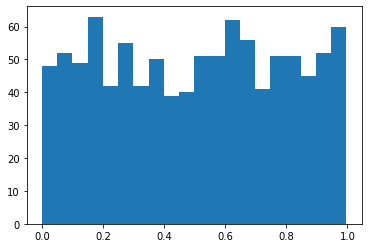

In [8]:
import numpy as np
import matplotlib.pyplot as plt
X = np.random.uniform(0, 1, 1000)
plt.hist(X, bins = 20)


(array([ 3.,  2.,  3.,  3.,  7.,  8., 15., 19., 16., 23., 29., 26., 18.,
        14.,  5.,  5.,  2.,  1.,  0.,  1.]),
 array([0.41581802, 0.42446648, 0.43311493, 0.44176338, 0.45041184,
        0.45906029, 0.46770875, 0.4763572 , 0.48500565, 0.49365411,
        0.50230256, 0.51095101, 0.51959947, 0.52824792, 0.53689637,
        0.54554483, 0.55419328, 0.56284174, 0.57149019, 0.58013864,
        0.5887871 ]),
 <BarContainer object of 20 artists>)

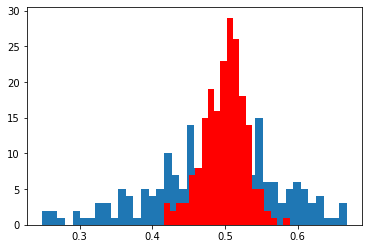

In [13]:
import numpy as np
X_bars = []

for i in range(200):
    ans = np.mean(np.random.uniform(0, 1, 10))
    X_bars.append(ans)

plt.hist(X_bars, bins = 40)

X_bars = []
for i in range(200):
 ans = np.mean( np.random.uniform(0,1,100) )
 X_bars.append(ans)
plt.hist(X_bars, bins=20, color='r')

In [ ]:
#ランダムフォレスト↓

In [14]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data # 説明変数
Y = iris.target # 目的変数(教師ラベル)


In [15]:
X_train = X[ np.arange(0, len(X), 2) ] # 偶数行: 学習データ(説明変数)
Y_train = Y[ np.arange(0, len(Y), 2) ] # 偶数行: 学習データ(目的変数: 教師ラベル)
X_test = X[ np.arange(1, len(X), 2) ] # 奇数行: テストデータ(説明変数)
Y_test = Y[ np.arange(1, len(Y), 2) ] # 奇数行: テストデータ(目的変数: 教師ラベル)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier( n_estimators=500, max_depth=10 )
# n_estimators:決定木の数
model.fit( X_train, Y_train )
Y_predicted = model.predict( X_test ) 

In [17]:
from sklearn import metrics
metrics.confusion_matrix(Y_test, Y_predicted)

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  2, 23]])

In [18]:
metrics.accuracy_score(Y_test, Y_predicted)

0.96

In [19]:
#勾配ブースティング(ブースティング＋決定木)


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=500, max_depth=10)
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)

metrics.confusion_matrix(Y_test, Y_predicted)




array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  2, 23]])

In [27]:
metrics.accuracy_score(Y_test, Y_predicted)

0.96

In [36]:
#buging+nuralnetwork

In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore') # 警告非表示
model = MLPClassifier() # ニューラルネットを指定
Bag_model = BaggingClassifier( base_estimator = model,
 n_estimators = 50, # 予測器の個数
 n_jobs=1, # 並列演算用のコア数
 random_state=1 ) # 乱数のシード
Bag_model.fit( X_train, Y_train )
Y_predicted = Bag_model.predict( X_test ) # いつもと同じ使い方

In [34]:
metrics.confusion_matrix( Y_test, Y_predicted ) 

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  2, 23]])

In [37]:
metrics.accuracy_score( Y_test, Y_predicted ) 


0.96

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier( n_neighbors=5 ) # k近傍法を指定
Bag_model = BaggingClassifier( base_estimator = model,
 n_estimators = 100, n_jobs=1, random_state=1 )
Bag_model.fit( X_train, Y_train )
Y_predicted = Bag_model.predict( X_test )

In [40]:
metrics.confusion_matrix( Y_test, Y_predicted ) 

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  1, 24]])

In [41]:
metrics.accuracy_score( Y_test, Y_predicted )

0.9733333333333334

In [42]:
Y_predicted = Bag_model.predict( X_train )
metrics.accuracy_score( Y_train, Y_predicted )

0.9733333333333334